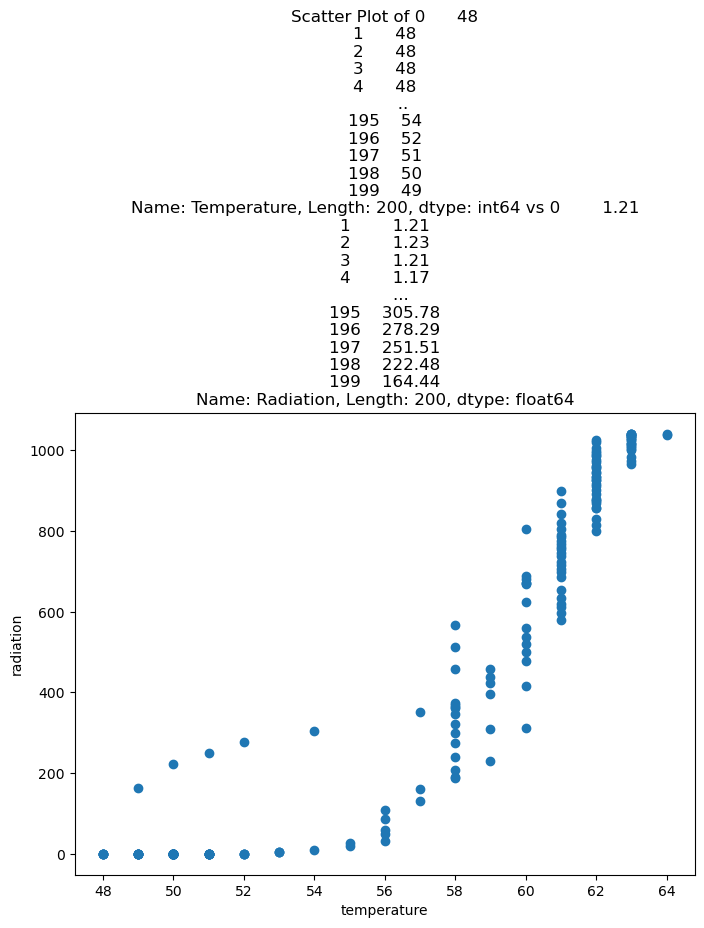

In [3]:
#A1. Take any 2 features from your project having has real numeric values. 
#Make a scatter plot of the data and observe the pattern.
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("SolarPredictionfinal.csv")


feature1 =data['Temperature'].head(200)
feature2 =data['Radiation'].head(200)


plt.figure(figsize=(8, 6))
plt.scatter(feature1, feature2, label="Data Points")
plt.title(f"Scatter Plot of {feature1} vs {feature2}")
plt.xlabel("temperature")
plt.ylabel("radiation")


# Show the plot
plt.show()


Coefficients: 
 [[73.60677801]]
Mean squared error: 868544970.91
Coefficient of determination: -47477.32


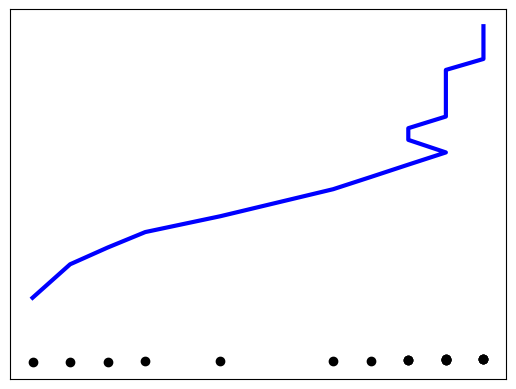

In [4]:
#  Create a linear regression model on this data.
# Consider using one feature as independent variable while the other as dependent variable
# (you may also round this number to integer).
# After the model is created, calculate the mean square error by predicting the values from the model.

import matplotlib.pyplot as plt
import numpy as np

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score


X_train = feature1[:-20].values.reshape(-1,1)
X_test = feature1[-20:].values.reshape(-1,1)


Y_train = feature2[:-20].values.reshape(-1,1)
Y_test = feature2[-20:].values.reshape(-1,1)


regr = linear_model.LinearRegression()


regr.fit(X_train,Y_train)


Y_pred = regr.predict(Y_test)


print("Coefficients: \n", regr.coef_)

print("Mean squared error: %.2f" % mean_squared_error(Y_test, Y_pred))

print("Coefficient of determination: %.2f" % r2_score(Y_test, Y_pred))


plt.scatter(X_test, Y_test, color="black")
plt.plot(X_test, Y_pred, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

In [15]:
import statistics

threshold = statistics.mean(data['Radiation'])

data['Binary_Label'] = (data['Radiation'] >= threshold).astype(int)


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
feat1=data['Humidity'].head(200).values.reshape(-1,1)
label=data['Binary_Label'].head(200).values.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(feat1,label, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = LogisticRegression(C=1.0, solver='liblinear')
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)


conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)




Accuracy: 0.80
Confusion Matrix:
 [[12  5]
 [ 3 20]]
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.71      0.75        17
           1       0.80      0.87      0.83        23

    accuracy                           0.80        40
   macro avg       0.80      0.79      0.79        40
weighted avg       0.80      0.80      0.80        40



C:\Users\HP\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [18]:

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

X_train = feature1[:-20].values.reshape(-1,1)
X_test = feature1[-20:].values.reshape(-1,1)
Y_train = feature2[:-20].values.reshape(-1,1)
Y_test = feature2[-20:].values.reshape(-1,1)

tree_regressor = DecisionTreeRegressor(random_state=42)
tree_regressor.fit(X_train, Y_train)

tree_predictions = tree_regressor.predict(X_test)

tree_mse = mean_squared_error(Y_test, tree_predictions)
print(f"Decision Tree MSE: {tree_mse:.2f}")

knn_regressor = KNeighborsRegressor(n_neighbors=5)  
knn_regressor.fit(X_train, Y_train)

knn_predictions = knn_regressor.predict(X_test)

knn_mse = mean_squared_error(Y_test, knn_predictions)
print(f"k-NN Regressor MSE: {knn_mse:.2f}")


Decision Tree MSE: 30125.71
k-NN Regressor MSE: 27683.26
